<a href="https://colab.research.google.com/github/HeliosRider/deep-learning-challenge/blob/main/AlphabetSoupCharity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [ ]:
import sys
#!{sys.executable} -m pip install tensorflow

# Import our dependencies
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
from pathlib import Path


# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("Resources/clean_loan_data.csv")

loan_df = pd.read_csv(file_path)

# Review the DataFrame
loan_df.head()

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/48.6 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.6 kB ? eta -:--:--
     -------------------------------------- 48.6/48.6 kB 815.7 kB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   -------------------

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [4]:
# Verify number of samples and features in current DatatFrame.

loan_df.shape


(44995, 14)

In [5]:
# Drop the non-beneficial ID columns, 'person_gender' and 'person_education'.

loan_df = loan_df.drop(columns=['person_gender','person_education'])
new_loan_df=loan_df
new_loan_df.head()

,person_age,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [6]:
# Verify number of samples and features updated from dropping 'person_gender' and 'person_education'..
new_loan_df.shape

(44995, 12)

In [7]:
# Convert categorical data to numeric with `pd.get_dummies`
new_loan_df = pd.get_dummies(new_loan_df)
new_loan_df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_home_ownership_MORTGAGE,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,22,71948,0,35000,16.02,0.49,3,561,1,False,...,False,True,False,False,False,False,True,False,True,False
1,21,12282,0,1000,11.14,0.08,2,504,0,False,...,True,False,False,True,False,False,False,False,False,True
2,25,12438,3,5500,12.87,0.44,3,635,1,True,...,False,False,False,False,False,True,False,False,True,False
3,23,79753,0,35000,15.23,0.44,2,675,1,False,...,False,True,False,False,False,True,False,False,True,False
4,24,66135,1,35000,14.27,0.53,4,586,1,False,...,False,True,False,False,False,True,False,False,True,False


In [8]:
# Split the preprocessed data into our features and target arrays
y =new_loan_df['loan_status'].values
X = new_loan_df.drop(columns=['loan_status']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
print(X_test.shape)

(11249, 20)


In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [11]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]
[20]

# Create the Keras Sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

dnn = tf.keras.models.Sequential()

# First hidden layer
dnn.add(Dense(20, activation='relu', input_shape=(number_input_features,)))

# Second hidden layer
dnn.add(Dense(64, activation='relu'))

# Output layer
dnn.add(Dense(1, activation='sigmoid'))

# Check the structure of the model
dnn.summary()

c:\Users\lord1\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,829 (7.14 KB)

 Trainable params: 1,829 (7.14 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the model
from tensorflow.keras.optimizers import Adam
dnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
fit_model = dnn.fit(X_train_scaled, y_train, epochs=100) #callbacks=[save_weights_callback])

Epoch 1/100
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8547 - loss: 0.3148
Epoch 2/100
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9049 - loss: 0.2084
Epoch 3/100
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9110 - loss: 0.1954
Epoch 4/100
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9123 - loss: 0.1923
Epoch 5/100
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9158 - loss: 0.1874
Epoch 6/100
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9148 - loss: 0.1860
Epoch 7/100
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9154 - loss: 0.1869
Epoch 8/100
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9177 - loss: 0.1844
Epoch 9/100
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9199 - loss: 0.1788
Epoch 10/100
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9168 - loss: 0.1838
Epoch 11/100
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9195 - loss: 0.1797
Epoch 12/100
1055/1

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = dnn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

352/352 - 1s - 2ms/step - accuracy: 0.9233 - loss: 0.1759
Loss: 0.17589935660362244, Accuracy: 0.9232820868492126


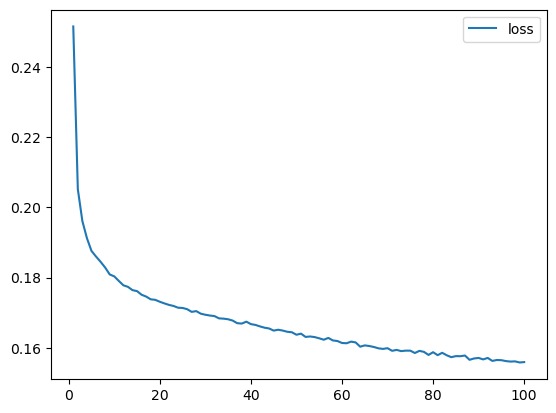

In [15]:
# Displaying a plot of the model loss data

# First, create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Secondly, ncrease the index by 1 to match the number of epochs
history_df.index += 1

# lastly, Plot the loss
history_df.plot(y="loss")
plt.show()

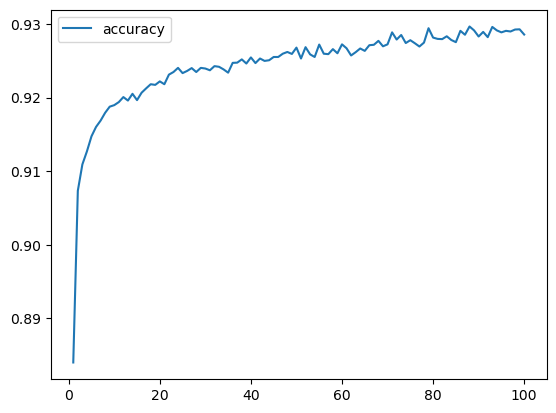

In [16]:
# Displaying a plot of the model accuracy data

# Plotting  the accuracy
history_df.plot(y="accuracy")
plt.show()